In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

This are the entires from my personal mood tracker Daylio (without activity, cause it's a bit personal). BTW, highly recommended. 

I will use it later for a project connecting mood and sleep. 

### Reading, Cleaning and Rearranging Data

In [2]:
daylio = pd.read_csv('daylio.csv')
#this data is a little bit cleaned just for the sake of privacy

In [3]:
daylio.head(2)

,full_date,weekday,time,mood
0,2022-02-01,Tuesday,18:07,meh
1,2022-02-01,Tuesday,11:49,fine I’m fine


In [4]:
daylio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1621 entries, 0 to 1620
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_date  1621 non-null   object
 1   weekday    1621 non-null   object
 2   time       1621 non-null   object
 3   mood       1621 non-null   object
dtypes: object(4)
memory usage: 50.8+ KB


In [5]:
daylio['mood'].unique()

array(['meh', 'fine I’m fine ', 'sick', 'in love', 'bad', 'anxious',
       'wannadie', 'calm happy', 'little tears', 'agitated', 'excited',
       'irritated', 'awful', 'angry'], dtype=object)

In [6]:
# i need the mood as numbers instead of descriptions. Which mood is what number I know from the app 
mood_score = {
    "fine I’m fine ": 4,
    'meh':3,
    'sick':3,
    'in love':5,
    'irritated': 3,
    'anxious': 2,
    'bad': 2,
    'little tears': 2,
    'calm happy': 5,
    'excited': 5,
    'wannadie': 1,
    'awful': 1,
    'agitated': 4,
    'angry': 1
}
daylio = daylio.replace({"mood": mood_score})

In [7]:
#get the timeseries of date and time
daylio["date_time"] = daylio["full_date"] + ' ' + daylio['time']
daylio["date_time"] = pd.to_datetime(daylio["date_time"], format = '%Y-%m-%d %H:%M')

daylio["full_date"] = pd.to_datetime(daylio['full_date'], format = '%Y-%m-%d')

In [8]:
daylio['weekend'] = ['Yes' if x in ['Saturday', 'Sunday'] \
                     else 'No' for x in daylio['weekday']]

In [9]:
daylio.head(2)

,full_date,weekday,time,mood,date_time,weekend
0,2022-02-01,Tuesday,18:07,3,2022-02-01 18:07:00,No
1,2022-02-01,Tuesday,11:49,4,2022-02-01 11:49:00,No


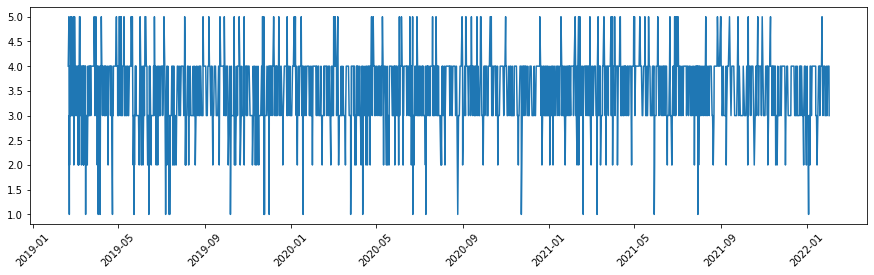

In [20]:
#all the moods. overall,there is a lot of stability between 3 and 4. 
plt.rcParams["figure.figsize"] = (15,4)

plt.plot(daylio["date_time"], daylio['mood'])
plt.xticks(rotation = 45)
plt.show()

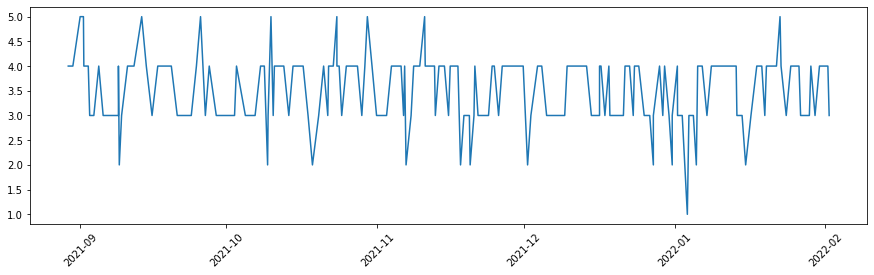

In [15]:
#slicing for closer look. I could be a drama queen, but not that much
#200 last moods because I know they are sorted
#plt.rcParams["figure.figsize"] = (15,4)

x = daylio.iloc[:200]["date_time"]
y = daylio.iloc[:200]['mood']
plt.plot(x, y)
plt.xticks(rotation = 45)
plt.show()

<AxesSubplot:ylabel='Frequency'>

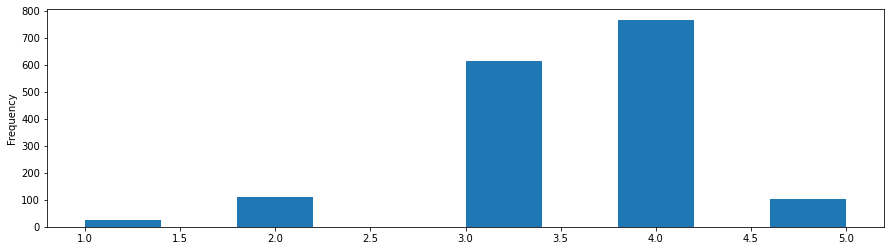

In [21]:
daylio['mood'].plot(kind = 'hist')

In [19]:
daylio['mood'].value_counts()

4    768
3    615
2    109
5    103
1     26
Name: mood, dtype: int64

### For the next part of this project I will omit the time and day of the week. But now I'm interested in how it effect my mood

In [22]:
daylio['hour'] = pd.DatetimeIndex(daylio['date_time']).hour

<AxesSubplot:xlabel='hour', ylabel='mood'>

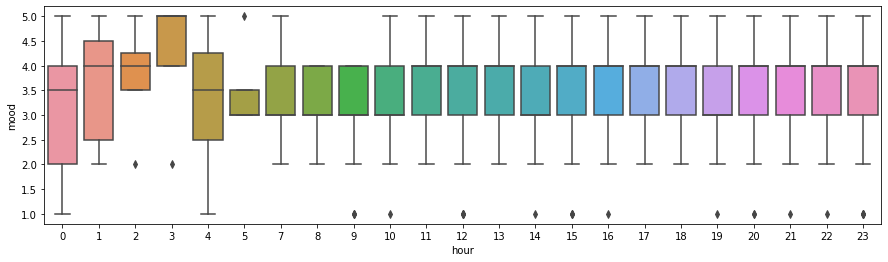

In [23]:
sns.boxplot(x = 'hour', y = 'mood', data = daylio)

###### Soooo when I log in the mood at midnight, it is on average worse. BUT if I log at 3 am, it's great. I have never logged anything at 6am. Also, I never logged '5' (best mood) at 8 and 9 in the morning. From the next table I see there are not many logs at night and the mood is pretty even after 10am. 

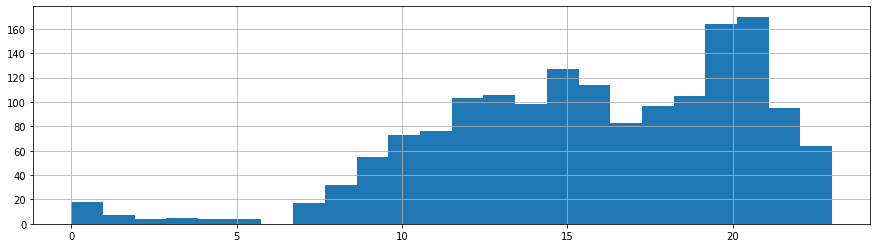

In [38]:
plt.hist(daylio['hour'], bins = 24)
plt.grid(True)
#I log mostly in the evening at 19-20

In [27]:
# the table to compare statistical significanse
hours = pd.pivot_table(daylio, index = 'hour', 
                          values = ['mood'], 
                          aggfunc = [np.mean, np.std, np.count_nonzero, np.max, np.min])
hours = hours.droplevel(level=1, axis =1)
hours.sort_values(by = 'mean')

,mean,std,count_nonzero,amax,amin
hour,,,,,
0,3.000000,1.283378,18,5,1
9,3.200000,0.825519,55,4,1
4,3.250000,1.707825,4,5,1
8,3.375000,0.659912,32,4,2
10,3.397260,0.701976,73,5,1
19,3.428571,0.744946,105,5,1
14,3.428571,0.732177,98,5,1
12,3.446602,0.915318,103,5,1
7,3.470588,0.717430,17,5,2


I'm too lazy to write my own statistical tests, so I've run "Comparison of means calculator"  here https://www.medcalc.org/calc/comparison_of_means.php

1) between midnight (worst ever mood) and 3am (best aver mood), the p-value  is 0.0786. Not significant. Not enough entries. 

2) between 9am (second worst) and 10pm (third best, but with sufficiant number of entries). P = 0.0001 Which is significant. 

I'm pretty sure it has something to do with sleep. More on it later. 

### Does it prove I am not a morning person?

In [41]:
# it may be a weird division, but I know me 

parts = {
    'night':[22,23,0,1,2,3,4,5],  #time I either sleep or party
    'morning': [6,7,8,9,10],  #time I wake up
    'day': [11,12,13,14,15,16], #time I try to be productive
    'evening':[17,18,19,20,21] # time I try to rest but tend to be even more productive
}

In [42]:
#this might be some weird way to do so, but the best I could thought about
def partss(ser):
    listok = []
    for i in ser:            
        for key in parts.keys():
            if i in parts[key]:
                listok.append(key)
    return listok

In [45]:
daylio['day_parts'] = pd.Series(partss(daylio['hour']))

In [47]:
daylio['day_parts'].value_counts()

day        624
evening    619
night      201
morning    177
Name: day_parts, dtype: int64

In [48]:
#now, another pivot table! 
day_parts = pd.pivot_table(daylio, index = 'day_parts', 
                          values = ['mood'], 
                          aggfunc = [np.mean, np.std, np.count_nonzero, np.max, np.min])
day_parts = day_parts.droplevel(level=1, axis =1)
day_parts.sort_values(by = 'mean')

,mean,std,count_nonzero,amax,amin
day_parts,,,,,
morning,3.338983,0.737244,177,5,1
day,3.482372,0.749324,624,5,1
evening,3.525040,0.731140,619,5,1
night,3.631841,1.001889,201,5,1


##### as expected, mornings are the worst. Also, it has the least numbers of entry, which means, I rarely log in the morning. But let's check if my mood in the morning  is significantly worse than during the day with the same tool https://www.medcalc.org/calc/comparison_of_means.php 

#### P = 0.0244 which is good enough to say
## I AM NOT A MORNING PERSON 

Maybe not a Monday person as well? 

In [49]:
week_day = pd.pivot_table(daylio, index = 'weekday', 
                          values = ['mood'], 
                          aggfunc = [np.mean, np.std, np.count_nonzero])
week_day = week_day.droplevel(level=1, axis =1)
week_day.sort_values(by = 'mean')

,mean,std,count_nonzero
weekday,,,
Monday,3.330275,0.738101,218
Wednesday,3.400000,0.739408,230
Tuesday,3.478873,0.676962,213
Thursday,3.489362,0.718270,235
Friday,3.552301,0.842905,239
Sunday,3.573770,0.850253,244
Saturday,3.661157,0.820421,242


##### I'm already sure there is statistical difference even between monday and friday (P = 0.003). I love Fridays more

In [58]:
#how about weekends? 
is_weekend = pd.pivot_table(daylio, index = 'weekend', 
                          values = ['mood'], 
                          aggfunc = [np.mean, np.std, np.count_nonzero])
is_weekend = is_weekend.droplevel(level=1, axis =1)
is_weekend.sort_values(by = 'mean')

#P = 0.0001 well this is good, means I can relax on weekends

,mean,std,count_nonzero
weekend,,,
No,3.451982,0.749564,1135
Yes,3.617284,0.835815,486


## Finnaly prepare the data to join it (later) with sleep and activity data

In [87]:
#join days together
each_day = pd.pivot_table(daylio, index = 'full_date', 
                          values = ['mood'], 
                          aggfunc = [np.mean, np.std, np.count_nonzero])
each_day = each_day.droplevel(level=1, axis =1)

In [88]:
#I decided I need one measure to look at variablility during the day. And that would be: 
each_day["mood_varying"] = (each_day['std'] * each_day['count_nonzero']).fillna(0)

In [89]:
#cosmetic changes
each_day.rename(
    columns = {
      'mean': 'mood_avg'  
    }, inplace = True)
each_day.index.names = ['date']
#don't need them any more
each_day = each_day.drop(['std','count_nonzero' ], axis = 1)
each_day.head()

,mood_avg,mood_varying
date,,
2019-02-19,4.00,0.000000
2019-02-20,5.00,0.000000
2019-02-21,2.25,3.829708
2019-02-22,3.75,2.000000
2019-02-23,4.00,3.000000


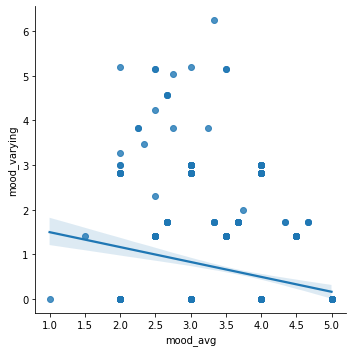

In [90]:
sns.lmplot(x="mood_avg", y="mood_varying", data=each_day)
#fun fact - less variation correlates with better mood. 
#it's because when I'm in the bad mood I'll always log that in

In [91]:
#exporting! 
each_day.to_csv('daylio_each_day.csv')

Sometimes I feel very low and very high on the same day and on average it is 'ok'. That is why I need the variability column. When it is big, it means I actually was not ok on that day even if the average mood is 3.5

<AxesSubplot:xlabel='date'>

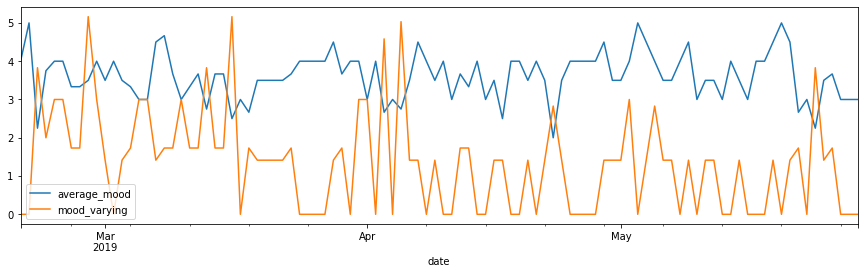

In [70]:
each_day[:100].plot()

(array([  2.,  86., 501., 490.]),
 array([1., 2., 3., 4., 5.]),
 <BarContainer object of 4 artists>)

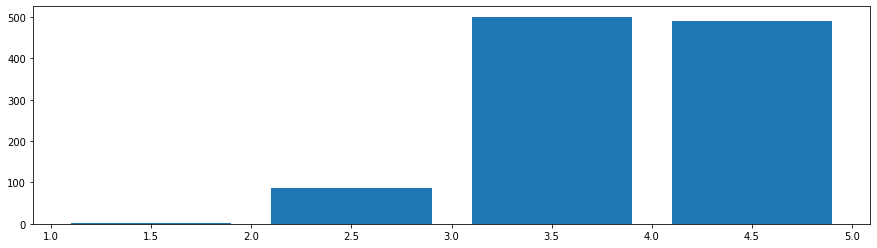

In [79]:
plt.hist(each_day['average_mood'], bins = [1., 2., 3., 4., 5. ], rwidth = 0.8)

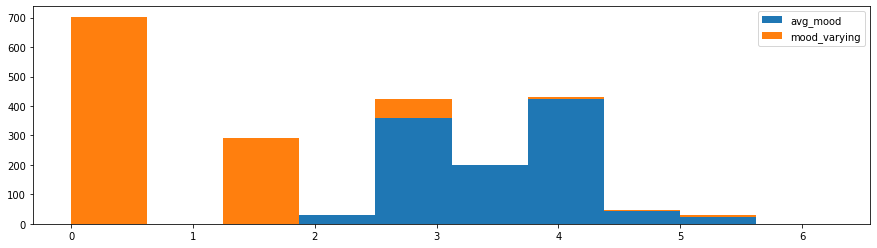

In [101]:
plt.hist([each_day['mood_avg'], each_day['mood_varying']],stacked = True, label = ['avg_mood', 'mood_varying'])
plt.legend()

### to be continued